In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
from matplotlib import pyplot as plt
from random import sample

In [3]:
'''People providing an organ for donation sometimes seek the help of a special "medical consultant". 
These consultants assist the patient in all aspects of the surgery, with the goal of reducing
the possibility of complications during the medical procedure and recovery. Patients might choose
a consultant based in part on the historical complication rate of the consultant's clients. One consultant 
tried to attract patients by noting the average complication rate for liver donor surgeries in
the US is about 10%, but her clients have only had 3 complications in the 62 liver donor surgeries
she has facilitated. She claims this is strong evidence that her work meaningfully contributes to
reducing complications (and therefore she should be hired!).
H0: there's no association between the consultant's contributions and the client's complication rate.
HA: patients who work with the consultant have a lower rate of complication rate than %10
'''

patients = 62 # consultant's 62 clients
comp_rate = .10 # claimed US general complication rate claimed by the consultant, which will be H0
not_comp_rate = 1 - comp_rate 
prop_list = list() # empty list for the simulated proportions
sim_num = 10000 # how many times we'll simulate
cons_rate = 3 / patients # consultant's claimed complication rate
print("consultant's complication rate",cons_rate)

for i in range(0,sim_num):
    x = np.array(["complication", "not"]) # creating an array of possible outcomes
    possible_entries = np.repeat(x, [comp_rate*10, not_comp_rate*10], axis=0) # the array for possible entries
    sampled_entries = list()
    for i in range(0,patients):
        sampled_entry = random.sample(list(possible_entries), k=1)[0] # sampling from the possible entries
        sampled_entries.append(sampled_entry) # appending the sample to a list
    prop = sampled_entries.count('complication')/patients # calculate proportion rate from the sampled entry list
    prop_list.append(prop) # add the proportion to the proportion list
print("OVERVIEW TO THE PROPORTIONS IN SIMULATION: ",prop_list[0:10])

# LEFT TAIL calculation. the observations which is less than phat. 
def condition(x):
    return x<=cons_rate
left_tail = sum(condition(x) for x in prop_list) / sim_num
print("LEFT TAIL PROBABILITY: ",left_tail)
print('''since it's greater than our significance level of 0.05, we can not reject H0 and conclude:
the data does not provide convincing evidence about an association between the consultant's work and fewer surgery complications''')

consultant's complication rate 0.04838709677419355
OVERVIEW TO THE PROPORTIONS IN SIMULATION:  [0.06451612903225806, 0.14516129032258066, 0.11290322580645161, 0.16129032258064516, 0.0967741935483871, 0.03225806451612903, 0.04838709677419355, 0.0967741935483871, 0.12903225806451613, 0.12903225806451613]
LEFT TAIL PROBABILITY:  0.1168
since it's greater than our significance level of 0.05, we can not reject H0 and conclude:
the data does not provide convincing evidence about an association between the consultant's work and fewer surgery complications


(array([ 107., 1061., 2777., 3200., 1942.,  711.,  168.,   27.,    7.]),
 array([0.        , 0.03046595, 0.0609319 , 0.09139785, 0.1218638 ,
        0.15232975, 0.1827957 , 0.21326165, 0.2437276 , 0.27419355]),
 <BarContainer object of 9 artists>)

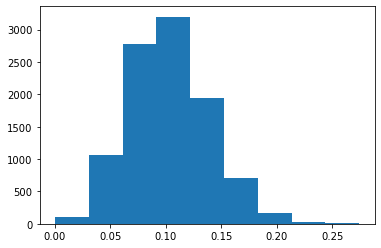

In [5]:
plt.hist(prop_list,9)

In [10]:
# generating the exact null distribution and p-value // binomial distribution
n = 62
k = 3 # we want to calculate probabilities for 3 or less complications.
p = .1  # null hypothesis, national average
minusp = 1 - p
a = list()
for j in range(0,k):
    calc = math.comb(n,j) * (p**j) * minusp**(n-j)
    a.append(calc) # i think watching inside a list is better because we can see the components easily with hashing. 

print(sum(a)," as seen, the two p-values generated with the first method and the binomial distribution calculation are so close.")

0.045464360587835186  as seen, the two p-values generated with the first method and the binomial distribution calculation are so close.


In [2]:
'''6.1 Vegetarian college students. Suppose that 8% of college students are vegetarians. Determine if the
following statements are true or false, and explain your reasoning.
(a) The distribution of the sample proportions of vegetarians in random samples of size 60 is approximately
normal since n >= 30.
(b) The distribution of the sample proportions of vegetarian college students in random samples of size 50
is right skewed.
(c) A random sample of 125 college students where 12% are vegetarians would be considered unusual.
(d) A random sample of 250 college students where 12% are vegetarians would be considered unusual.
(e) The standard error would be reduced by one-half if we increased the sample size from 125 to 250.'''
p0 = .08
minus_p0 = 1-p0
phat = .12
print("a) ",60 * p0, "<10 --false, doesn't satisfy the success failure condition")
print("b) ",50 * p0, "<10 --doesn't satisfy the succes-failure condition. since the condition doesn't meet and there's a natural bound in 0, where we can not observe a negative proportion of college students are vegeterian; the distribution should be accumulated around 0. this will result in a right skewed distribution")

n1 = 125
succ1 = p0 * n1
fail1 = minus_p0 * n1
se1 = np.sqrt(p0*minus_p0 / n1) # calculate standard error for null value p0
z1 = (phat-p0)/se1 # computing z score, how many standard errors away the phat is from the null value in the null distribution.
# because we want to see how many standard errors away our .12 proportion is. if it's too far away from .8, we can say it's unusual
print('''c) n = {n1} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p0}
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ1}, (1-p0) * n = {fail1} // satisfied. 
since both conditions are met, the sampling distribution is normally distributed.
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p0})/{n1}) = {se1} // standard error calculation for computing z*
z* = {z1}
since the z-score is not too far away from the phat, we can't say .12 vegeterian fraction is unusual in the sample of 125 students.
'''.format(n1=n1,p0=p0,phat=phat, minus_p0= minus_p0, succ1=succ1, fail1=fail1, se1 = se1,z1=z1))


n2 = 250
succ2 = p0 * n2
fail2 = minus_p0 * n2
se2 = np.sqrt(p0*minus_p0 / n2) # calculate standard error for null value p0
z2 = (phat-p0)/se2 # computing z score, how many standard errors away the phat is from the null value in the null distribution.
# because we want to see how many standard errors away our .12 proportion is. if it's too far away from .8, we can say it's unusual

print(''' d) n = {n2} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p0}
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ2}, (1-p0) * n = {fail2} // satisfied. 
since both conditions are met, the sampling distribution is normally distributed.
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p0})/{n2}) = {se2} // standard error calculation for computing z*
z* = {z2}
since the z-score is far away from the phat, we can say .12 vegeterian fraction is unusual in the sample of 250 students.
as seen in the example, when we collected more data, sampled more people we saw in this case the actual case is unusual but
in the previous level of sample size we were thinking that it's not unusual. that's why we always say "the data does not 
provide sufficient evidence to believe xxx". because we don't know the real fraction and the population parameter remains 
unknown, we're trying to avoid the mistaken opinion. 

e) false. simply doubling the sample size doesn't directly cut the SE in half because of the formula. in that case decreases
the SE 1/sqrt(2) times.
'''.format(n2=n2,p0=p0,phat=phat, minus_p0= minus_p0, succ2=succ2, fail2=fail2, se2 = se2,z2=z2))

a)  4.8 <10 --false, doesn't satisfy the success failure condition
b)  4.0 <10 --doesn't satisfy the succes-failure condition. since the condition doesn't meet and there's a natural bound in 0, where we can not observe a negative proportion of college students are vegeterian; the distribution should be accumulated around 0. this will result in a right skewed distribution
c) n = 125 , p0 = 0.08, phat = 0.12, 1-p0 = 0.92
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = 10.0, (1-p0) * n = 115.0 // satisfied. 
since both conditions are met, the sampling distribution is normally distributed.
SE = sqrt(p(1-p)/n) = sqrt((0.08*0.92)/125) = 0.02426520142096496 // standard error calculation for computing z*
z* = 1.6484511834894673
since the z-score is not too far away from the phat, we can't say .12 vegeterian fraction is unusual in the sample of 125 students.

 d) n = 250 , p0 = 0.08, phat = 0.12, 1-p0 = 0.92
- independence condition s

In [3]:
'''6.2 Young Americans, Part I. About 77% of young adults think they can achieve the American dream.
Determine if the following statements are true or false, and explain your reasoning.
(a) The distribution of sample proportions of young Americans who think they can achieve the American
dream in samples of size 20 is left skewed.
(b) The distribution of sample proportions of young Americans who think they can achieve the American
dream in random samples of size 40 is approximately normal since n >= 30.
(c) A random sample of 60 young Americans where 85% think they can achieve the American dream would
be considered unusual.
(d) A random sample of 120 young Americans where 85% think they can achieve the American dream would
be considered unusual.'''

p0 = .77
minus_p0 = 1-p0
n = 20
succ = p0 * n
fail = minus_p0 * n
print('''a) success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // isn't satisfied because of failure condition. 
the statement is true, there's a natural bound in %100. it's expected be slightly left skewed.
'''.format(n=n,p0=p0, minus_p0= minus_p0, succ=succ, fail=fail))

n1 = 40
succ1 = p0 * n1
fail1 = minus_p0 * n1
print('''b) success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // false. s/f condition isn't satisfied because of
the failure condition. we expect a slight skew in the distribution.
'''.format(n=n1,p0=p0, minus_p0= minus_p0, succ=succ1, fail=fail1))

phat = .85
n2 = 60
succ2 = p0 * n2
fail2 = minus_p0 * n2
se2 = np.sqrt(p0*minus_p0 / n2) # calculate standard error for null value p0
z2 = (phat-p0)/se2 # computing z score, how many standard errors away the phat is from the null value in the null distribution.
# because we want to see how many standard errors away our .12 proportion is. if it's too far away from .8, we can say it's unusual

print('''c) n = {n} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p0}
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // satisfied. 
since both conditions are met, the sampling distribution is normally distributed.
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p0})/{n}) = {se} // standard error calculation for computing z*
z* = {z}
since the z-score is not too far away from the phat, we can't say .12 vegeterian fraction is unusual in the sample of 60 students.
'''.format(n=n2,p0=p0,phat=phat, minus_p0= minus_p0, succ=succ2, fail=fail2, se = se2,z=z2))

n3 = 120
succ3 = p0 * n3
fail3 = minus_p0 * n3
se3 = np.sqrt(p0*minus_p0 / n3) # calculate standard error for null value p0
z3 = (phat-p0)/se3 # computing z score, how many standard errors away the phat is from the null value in the null distribution.
# because we want to see how many standard errors away our .12 proportion is. if it's too far away from .8, we can say it's unusual

print('''d) n = {n} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p0}
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // satisfied. 
since both conditions are met, the sampling distribution is normally distributed.
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p0})/{n}) = {se} // standard error calculation for computing z*
z* = {z}
since the z-score is far away from the phat, we can say .12 vegeterian fraction is unusual in the sample of 120 students.
'''.format(n=n3,p0=p0,phat=phat, minus_p0= minus_p0, succ=succ3, fail=fail3, se = se3,z=z3))

a) success-failure condition: p0 * n = 15.4, (1-p0) * n = 4.6 // isn't satisfied because of failure condition. 
the statement is true, there's a natural bound in %100. it's expected be slightly left skewed.

b) success-failure condition: p0 * n = 30.8, (1-p0) * n = 9.2 // false. s/f condition isn't satisfied because of
the failure condition. we expect a slight skew in the distribution.

c) n = 60 , p0 = 0.77, phat = 0.85, 1-p0 = 0.22999999999999998
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = 46.2, (1-p0) * n = 13.799999999999999 // satisfied. 
since both conditions are met, the sampling distribution is normally distributed.
SE = sqrt(p(1-p)/n) = sqrt((0.77*0.22999999999999998)/60) = 0.05432924319983361 // standard error calculation for computing z*
z* = 1.4725034859356365
since the z-score is not too far away from the phat, we can't say .12 vegeterian fraction is unusual in the sample of 60 students.

d) n = 120 , p0 = 0.

In [4]:
'''6.3 Orange tabbies. Suppose that 90% of orange tabby cats are male. Determine if the following state-
ments are true or false, and explain your reasoning.
(a) The distribution of sample proportions of random samples of size 30 is left skewed.
(b) Using a sample size that is 4 times as large will reduce the standard error of the sample proportion by
one-half.
(c) The distribution of sample proportions of random samples of size 140 is approximately normal.
(d) The distribution of sample proportions of random samples of size 280 is approximately normal.'''

p0 = .90
minus_p0 = 1-p0
n = 30
succ = p0 * n
fail = minus_p0 * n
print('''a) success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // true. isn't satisfied because of failure condition. 
the statement is true, there's a natural bound in %100. it's expected be slightly left skewed.
'''.format(n=n,p0=p0, minus_p0= minus_p0, succ=succ, fail=fail))

n1 = 120 # changing the sample size as 4 times larger
se = np.sqrt(p0*minus_p0 / n) # calculate standard error for the first sample size
se1 = np.sqrt(p0*minus_p0 / n1) # calculate standard error for the second sample size
reduced = se1 / se 
print('''b) true. the standard error for sample size of 30 is: {se}
the standard error for sample size of 120 (4 times larger than ) is: {se1}
the standard error is reduced {reduced} times when the sample size is 4 times larger
'''.format(se=se, se1=se1, reduced=reduced))

n2 = 140
succ2 = p0 * n2
fail2 = minus_p0 * n2
print('''c) success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} //  true. because it's randomly sampled
and success-failure condition is met.
'''.format(n=n2,p0=p0, minus_p0= minus_p0, succ=succ2, fail=fail2))

n3 = 280
succ2 = p0 * n3
fail2 = minus_p0 * n3
print('''d) success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} //  true. because it's randomly sampled
and success-failure condition is met.
'''.format(n=n3,p0=p0, minus_p0= minus_p0, succ=succ3, fail=fail3))

a) success-failure condition: p0 * n = 27.0, (1-p0) * n = 2.999999999999999 // true. isn't satisfied because of failure condition. 
the statement is true, there's a natural bound in %100. it's expected be slightly left skewed.

b) true. the standard error for sample size of 30 is: 0.054772255750516606
the standard error for sample size of 120 (4 times larger than ) is: 0.027386127875258303
the standard error is reduced 0.5 times when the sample size is 4 times larger

c) success-failure condition: p0 * n = 126.0, (1-p0) * n = 13.999999999999996 //  true. because it's randomly sampled
and success-failure condition is met.

d) success-failure condition: p0 * n = 92.4, (1-p0) * n = 27.599999999999998 //  true. because it's randomly sampled
and success-failure condition is met.



In [5]:
'''6.4 Young Americans, Part II. About 25% of young Americans have delayed starting a family due to
the continued economic slump. Determine if the following statements are true or false, and explain your
reasoning.
(a) The distribution of sample proportions of young Americans who have delayed starting a family due to
the continued economic slump in random samples of size 12 is right skewed.
(b) In order for the distribution of sample proportions of young Americans who have delayed starting a
family due to the continued economic slump to be approximately normal, we need random samples
where the sample size is at least 40.
(c) A random sample of 50 young Americans where 20% have delayed starting a family due to the continued
economic slump would be considered unusual.
(d) A random sample of 150 young Americans where 20% have delayed starting a family due to the continued
economic slump would be considered unusual.
(e) Tripling the sample size will reduce the standard error of the sample proportion by one-third.'''

print('''
a) true. because the success-failure condition does not satisfy and there's a natural bound in 0.

b) true. because less than 40 samples will not satisfy success-failure condition. we'll see skewed distributions if the condition does not satisfy.
''')

phat = .20
p0 = .25
minus_p0 = 1-p0
n = 50
succ = p0 * n
fail = minus_p0 * n
se = np.sqrt(p0*minus_p0 / n) # calculate standard error for null value p0
z = (phat-p0)/se # computing z score, how many standard errors away the phat is from the null value in the null distribution.
# because we want to see how many standard errors away our .20 proportion is. if it's too far away from .25 by standard errors,
# we can say it's unusual

print('''c) n = {n} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p0}
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // satisfied. 
since both conditions are met, the sampling distribution is normally distributed.
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p0})/{n}) = {se} // standard error calculation for computing z*
z* = {z}
since the z-score is not sufficiently far away from the phat, we can say {phat} fraction is unusual in the sample of {n} young americans.
'''.format(n=n,p0=p0,phat=phat, minus_p0= minus_p0, succ=succ, fail=fail, se = se,z=z))

n1 = 150
succ1 = p0 * n1
fail1 = minus_p0 * n1
se1 = np.sqrt(p0*minus_p0 / n1) # calculate standard error for null value p0
z = (phat-p0)/se1 # computing z score, how many standard errors away the phat is from the null value in the null distribution.
# because we want to see how many standard errors away our .12 proportion is. if it's too far away from .8, we can say it's unusual

print('''d) n = {n} , p0 = {p0}, phat = {phat}, 1-p0 = {minus_p0}
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = {succ}, (1-p0) * n = {fail} // satisfied. 
since both conditions are met, the sampling distribution is normally distributed.
SE = sqrt(p(1-p)/n) = sqrt(({p0}*{minus_p0})/{n}) = {se} // standard error calculation for computing z*
z* = {z}
since the z-score is not sufficiently far away from the phat, we can say {phat} fraction is unusual in the sample of {n} young americans.
'''.format(n=n1,p0=p0,phat=phat, minus_p0= minus_p0, succ=succ1, fail=fail1, se = se1, z=z1))


a) true. because the success-failure condition does not satisfy and there's a natural bound in 0.

b) true. because less than 40 samples will not satisfy success-failure condition. we'll see skewed distributions if the condition does not satisfy.

c) n = 50 , p0 = 0.25, phat = 0.2, 1-p0 = 0.75
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = 12.5, (1-p0) * n = 37.5 // satisfied. 
since both conditions are met, the sampling distribution is normally distributed.
SE = sqrt(p(1-p)/n) = sqrt((0.25*0.75)/50) = 0.06123724356957945 // standard error calculation for computing z*
z* = -0.8164965809277259
since the z-score is not sufficiently far away from the phat, we can say 0.2 fraction is unusual in the sample of 50 young americans.

d) n = 150 , p0 = 0.25, phat = 0.2, 1-p0 = 0.75
- independence condition satisfied since the poll is randomly sampled.
- success-failure condition: p0 * n = 37.5, (1-p0) * n = 112.5 // satisfied. 
since

In [6]:
'''6.5 Gender equality. The General Social Survey asked a random sample of 1,390 Americans the following
question: "On the whole, do you think it should or should not be the government's responsibility to promote
equality between men and women?" 82% of the respondents said it "should be". At a 95% confidence level,
this sample has 2% margin of error. Based on this information, determine if the following statements are
true or false, and explain your reasoning.
(a) We are 95% confident that between 80% and 84% of Americans in this sample think it's the government's
responsibility to promote equality between men and women.
(b) We are 95% confident that between 80% and 84% of all Americans think it's the government's respon-
sibility to promote equality between men and women.
(c) If we considered many random samples of 1,390 Americans, and we calculated 95% confidence intervals
for each, 95% of these intervals would include the true population proportion of Americans who think
it's the government's responsibility to promote equality between men and women.
(d) In order to decrease the margin of error to 1%, we would need to quadruple (multiply by 4) the sample
size.
(e) Based on this confidence interval, there is sufficient evidence to conclude that a majority of Americans
think it's the government's responsibility to promote equality between men and women.'''

print('''a) false. because the confidence interval and hypothesis tests are for concluding on population proportion.
b) true statement.
c) true.
d) true. margin of error: z* x SE
standard error: sqrt(p*(1-p) / n)
if you want to cut the margin of error in half, you have to cut SE in half, and to do it you have to quadruple the sample size.
e) true. the confidence interval is above %50. we're 95% confident that there is a majority group in the true population.
''')

a) false. because the confidence interval and hypothesis tests are for concluding on population proportion.
b) true statement.
c) true.
d) true. margin of error: z* x SE
standard error: sqrt(p*(1-p) / n)
if you want to cut the margin of error in half, you have to cut SE in half, and to do it you have to quadruple the sample size.
e) true. the confidence interval is above %50. we're 95% confident that there is a majority group in the true population.



In [7]:
'''6.6 Elderly drivers. The Marist Poll published a report stating that 66% of adults nationally think licensed
drivers should be required to retake their road test once they reach 65 years of age. It was also reported
that interviews were conducted on 1,018 American adults, and that the margin of error was 3% using a 95%
confidence level.
(a) Verify the margin of error reported by The Marist Poll.
(b) Based on a 95% confidence interval, does the poll provide convincing evidence that more than 70% of
the population think that licensed drivers should be required to retake their road test once they turn
65?'''

n = 1018
phat = .66
minus_phat = 1 - phat
z = 1.96 # for the 95% significance level.
se = np.sqrt(phat*minus_phat / n)
me = z * se
lo = phat - me
hi = phat + me
print('''n = {n} , phat = {phat}, 1-phat = {minus_phat}
SE = sqrt(p(1-p)/n) = sqrt(({phat}*{minus_phat})/{n}) = {se}
z* = {z} , margin of error: z* x SE = {me}
confidence interval: (phat - z* x SE , phat + z* x SE) = ({lo},{hi})
'''.format(n=n,z=z,phat=phat, minus_phat= minus_phat, se = se, me = me, lo=lo, hi=hi))
print('''

''')

n = 1018 , phat = 0.66, 1-phat = 0.33999999999999997
SE = sqrt(p(1-p)/n) = sqrt((0.66*0.33999999999999997)/1018) = 0.014846959959509985
z* = 1.96 , margin of error: z* x SE = 0.02910004152063957
confidence interval: (phat - z* x SE , phat + z* x SE) = (0.6308999584793604,0.6891000415206396)






'''6.7 Fireworks on July 4th. A local news outlet reported that 56% of 600 randomly sampled Kansas
residents planned to set off fireworks on July 4th. Determine the margin of error for the 56% point estimate
using a 95% confidence level.'''
print('''

''')

In [8]:
'''6.8 Life rating in Greece. Greece has faced a severe economic crisis since the end of 2009. A Gallup poll
surveyed 1,000 randomly sampled Greeks in 2011 and found that 25% of them said they would rate their
lives poorly enough to be considered \suering".11
(a) Describe the population parameter of interest. What is the value of the point estimate of this parameter?
(b) Check if the conditions required for constructing a condence interval based on these data are met.
(c) Construct a 95% condence interval for the proportion of Greeks who are \suering".
(d) Without doing any calculations, describe what would happen to the condence interval if we decided to
use a higher condence level.
(e) Without doing any calculations, describe what would happen to the condence interval if we used a
larger sample.'''
print('''

''')

In [9]:
'''6.9 Study abroad. A survey on 1,509 high school seniors who took the SAT and who completed an optional
web survey shows that 55% of high school seniors are fairly certain that they will participate in a study
abroad program in college.12
(a) Is this sample a representative sample from the population of all high school seniors in the US? Explain
your reasoning.
(b) Let's suppose the conditions for inference are met. Even if your answer to part (a) indicated that this
approach would not be reliable, this analysis may still be interesting to carry out (though not report).
Construct a 90% condence interval for the proportion of high school seniors (of those who took the
SAT) who are fairly certain they will participate in a study abroad program in college, and interpret
this interval in context.
(c) What does \90% condence" mean?
(d) Based on this interval, would it be appropriate to claim that the majority of high school seniors are
fairly certain that they will participate in a study abroad program in college?'''
print('''

''')

In [10]:
'''6.10 Legalization of marijuana, Part I. The General Social Survey asked 1,578 US residents: \Do you
think the use of marijuana should be made legal, or not?" 61% of the respondents said it should be made
legal.13
(a) Is 61% a sample statistic or a population parameter? Explain.
(b) Construct a 95% condence interval for the proportion of US residents who think marijuana should be
made legal, and interpret it in the context of the data.
(c) A critic points out that this 95% condence interval is only accurate if the statistic follows a normal
distribution, or if the normal model is a good approximation. Is this true for these data? Explain.
(d) A news piece on this survey's ndings states, \Majority of Americans think marijuana should be legal-
ized." Based on your condence interval, is this news piece's statement justied?'''
print('''

''')

In [11]:
'''6.11 National Health Plan, Part I. A Kaiser Family Foundation poll for US adults in 2019 found that 79%
of Democrats, 55% of Independents, and 24% of Republicans supported a generic "National Health Plan".
There were 347 Democrats, 298 Republicans, and 617 Independents surveyed.14
(a) A political pundit on TV claims that a majority of Independents support a National Health Plan. Do
these data provide strong evidence to support this type of statement?
(b) Would you expect a confidence interval for the proportion of Independents who oppose the public option
plan to include 0.5? Explain.'''
print('''

''')

In [12]:
'''6.12 Is college worth it? Part I. Among a simple random sample of 331 American adults who do not have
a four-year college degree and are not currently enrolled in school, 48% said they decided not to go to college
because they could not aord school.15
(a) A newspaper article states that only a minority of the Americans who decide not to go to college do
so because they cannot aord it and uses the point estimate from this survey as evidence. Conduct a
hypothesis test to determine if these data provide strong evidence supporting this statement.
(b) Would you expect a condence interval for the proportion of American adults who decide not to go to
college because they cannot aord it to include 0.5? Explain.'''
print('''

''')

In [13]:
'''6.13 Taste test. Some people claim that they can tell the dierence between a diet soda and a regular soda
in the rst sip. A researcher wanting to test this claim randomly sampled 80 such people. He then lled 80
plain white cups with soda, half diet and half regular through random assignment, and asked each person
to take one sip from their cup and identify the soda as diet or regular. 53 participants correctly identied
the soda.
(a) Do these data provide strong evidence that these people are any better or worse than random guessing
at telling the dierence between diet and regular soda?
(b) Interpret the p-value in this context.'''
print('''

''')

In [14]:
'''6.14 Is college worth it? Part II. Exercise 6.12 presents the results of a poll where 48% of 331 Americans
who decide to not go to college do so because they cannot afford it.
(a) Calculate a 90% confidence interval for the proportion of Americans who decide to not go to college
because they cannot afford it, and interpret the interval in context.
(b) Suppose we wanted the margin of error for the 90% condence level to be about 1.5%. How large of a
survey would you recommend?'''
print('''

''')

In [15]:
'''6.15 National Health Plan, Part II. Exercise 6.11 presents the results of a poll evaluating support for a
generic "National Health Plan" in the US in 2019, reporting that 55% of Independents are supportive. If we
wanted to estimate this number to within 1% with 90% confidence, what would be an appropriate sample
size?'''
print('''

''')

In [16]:
'''6.16 Legalize Marijuana, Part II. As discussed in Exercise 6.10, the General Social Survey reported a
sample where about 61% of US residents thought marijuana should be made legal. If we wanted to limit the
margin of error of a 95% condence interval to 2%, about how many Americans would we need to survey?'''
print('''

''')